In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2183129170275564511, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13010196808108363050
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3443065431878567057
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7882999552188589758
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

170500096/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)         1327488   
_______________________________________________________

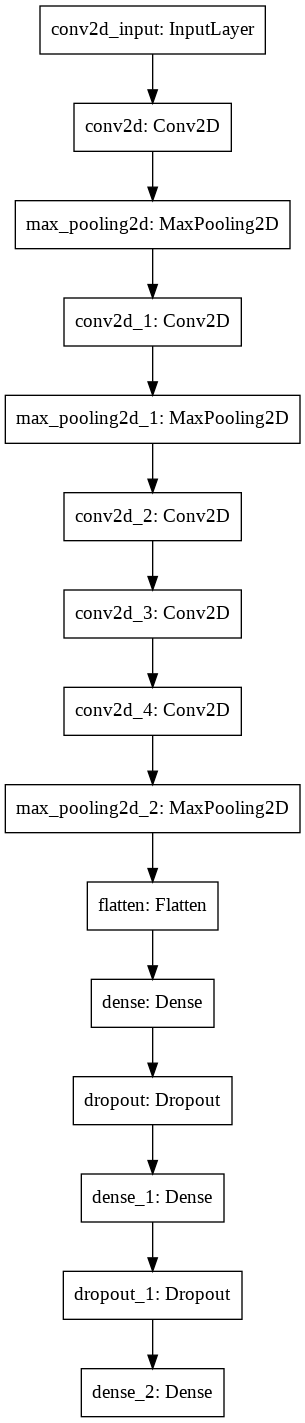

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# Variables
batch_size = 64
num_classes = 10
epochs = 10


# my model
model = keras.Sequential()
model.add(keras.layers.Conv2D(96,  kernel_size=(11,11),strides=(4,4), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256, kernel_size=(5,5),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(384, kernel_size=(3,3),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.Conv2D(384, kernel_size=(3,3),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

# Saving the model
save_dir = 'drive/My Drive/Colab Notebooks'
model_name = 'cifar10.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Evaluate
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Accuracy',test_acc)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 1.9837 - accuracy: 0.2218 - val_loss: 1.8038 - val_accuracy: 0.3129
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.6684 - accuracy: 0.3832 - val_loss: 1.5675 - val_accuracy: 0.4229
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5222 - accuracy: 0.4536 - val_loss: 1.4613 - val_accuracy: 0.4719
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.4369 - accuracy: 0.4842 - val_loss: 1.4173 - val_accuracy: 0.4795
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 1.3716 - accuracy: 0.5113 - val_loss: 1.3898 - val_accuracy: 0.5075
Epoch 6/10
782/782 [==============================] - 7s 10ms/step - loss: 1.3207 - accuracy: 0.5317 - val_loss: 1.3296 - val_accuracy: 0.5355
Epoch 7/10
782/782 [==============================] - 7s 10ms/step - loss: 1.2602 - accuracy: 0.5522 - val_loss: 1.3756 - val_accuracy: 0.5143
Epo

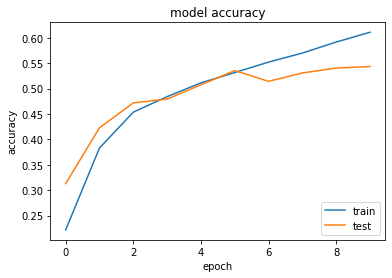

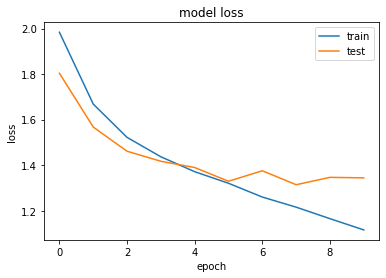

In [5]:
# Plotting the metrics
fig = plt.figure()
#plt.subplot(2,1,1)
plt.plot()
# plt.scatter(history.history['accuracy'],history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.show()

#plt.subplot(2,1,2)
plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('model_loss.png')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


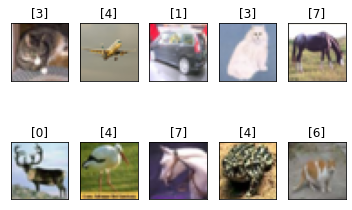

In [6]:
# Predict
# 0 = Airplane, 1 = Automobile, 2 = Bird, 3 = Cat, 4 = Deer
# 5 = Dog, 6 = Frog, 7 = Horse, 8 = Ship, 9 = Truck
from random import randint

for i in range(10):  
    plt.subplot(2,5,i+1)
    plt.rcParams["figure.figsize"] = (20,9)
    index = randint(0,9999)
    plt.imshow(x_train[index])
    plt.xticks([])
    plt.yticks([])
    prediction = model.predict_classes(x_train[index].reshape(1,32,32,3))
    plt.title(prediction)
    plt.savefig('test_set.png')
plt.show()

